# 可视化各类EIS数据

## 加载EIS数据 

### 加载EIS原始数据

In [4]:
import os
import pickle
# Function location: prj/utils/file_utils/dataset_reader_pack/ml_dataset_reader.py
def get_raw_T_V_T_dataset(file_path, file_date_str='2020_03_07'):
    raw_training_dataset = None
    raw_validation_dataset = None
    raw_test_dataset = None

    tr_file_path = os.path.join(file_path, 'ml_raw_train_data_dict_pickle_' + file_date_str + '.file')
    va_file_path = os.path.join(file_path, 'ml_raw_vali_data_dict_pickle_' + file_date_str + '.file')
    te_file_path = os.path.join(file_path, 'ml_raw_test_data_dict_pickle_' + file_date_str + '.file')

    with open(tr_file_path, 'rb') as file:
        raw_training_dataset = pickle.load(file)
    with open(va_file_path, 'rb') as file:
        raw_validation_dataset = pickle.load(file)
    with open(te_file_path, 'rb') as file:
        raw_test_dataset = pickle.load(file)
    return raw_training_dataset, raw_validation_dataset, raw_test_dataset

In [5]:
raw_file_path = '../../datasets/ml_datasets/raw/'
raw_training_dataset, raw_validation_dataset, raw_test_dataset = get_raw_T_V_T_dataset(file_path = raw_file_path)

### 加载EIS归一化后的数据

In [6]:
# Function location: prj/utils/file_utils/dataset_reader_pack/ml_dataset_reader.py
def get_T_V_T_dataset(file_path, file_date_str='2020_03_07'):
    training_dataset = None
    validation_dataset = None
    test_dataset = None

    tr_file_path = os.path.join(file_path, 'ml_normed_train_data_list_pickle_'+file_date_str+'.file')
    va_file_path = os.path.join(file_path, 'ml_normed_vali_data_list_pickle_'+file_date_str+'.file')
    te_file_path = os.path.join(file_path, 'ml_normed_test_data_list_pickle_'+file_date_str+'.file')

    with open(tr_file_path, 'rb') as file:
        training_dataset = pickle.load(file)
    with open(va_file_path, 'rb') as file:
        validation_dataset = pickle.load(file)
    with open(te_file_path, 'rb') as file:
        test_dataset = pickle.load(file)
    return training_dataset, validation_dataset, test_dataset

In [7]:
normed_file_path = '../../datasets/ml_datasets/normed/'
training_dataset, validation_dataset, test_dataset = get_T_V_T_dataset(file_path=normed_file_path)

## 可视化EIS-ECM-2阻抗数据

In [21]:
# Function location: prj/utils/file_utils/dataset_reader_pack/ml_dataset_reader.py
def get_raw_dataset_by_ecm_num(raw_training_dataset, raw_validation_dataset, raw_test_dataset, ecm_num):
    """
    Running steps:
        1-Before use this function, u should run function [get_raw_T_V_T_dataset] to
        get raw_training_dataset, raw_validation_dataset, raw_test_dataset
        2-raw_training_dataset, raw_validation_dataset, raw_test_dataset are dicts,
        and get the desired part from each one of them by inputting key[ecm_num]
    :param
        raw_training_dataset
        raw_validation_dataset
        raw_test_dataset
            the above three data have the same data structure:
                dict{
                        label (int): [
                                        [(x0, y0), (x1, y1), ..., (xn-2, yn-2), (xn-1, yn-1)]
                                        ...
                                        ]
                    }
        ecm_num:
            int
    :return:
        eis_imp_list
    """
    tr_data_list = raw_training_dataset[ecm_num]
    va_data_list = raw_validation_dataset[ecm_num]
    te_data_list = raw_test_dataset[ecm_num]

    eis_imp_list = []
    eis_imp_list.extend(tr_data_list)
    eis_imp_list.extend(va_data_list)
    eis_imp_list.extend(te_data_list)
    return eis_imp_list

def point_2_x_y(point_list):
    """
    point_list
        [(x0, y0), (x1, y1), ..., (xn-2, yn-2), (xn-1, yn-1)]
    return
        x_list = [x0, x1, x2, ...]
        y_list = [y0, y1, y2, ...]
    """
    x_list = []
    y_list = []
    for point in point_list:
        x_list.append(point[0])
        y_list.append(point[1])
#     print(x_list, y_list)
    return x_list, y_list

def split_eis_imp_2_real_imag(eis_raw_imp_list):
    """
    :param eis_raw_imp_list: result from function [get_raw_dataset_by_ecm_num]
    :return:
        list[
                [
                    z_real_list[],
                    z_imag_list[]
                ],
                ...
            ]
    """
    res_list = []
    for point_list in eis_raw_imp_list:
        x_list, y_list = point_2_x_y(point_list)
        res_list.append([x_list, y_list])
    return res_list


### 可视化EIS-ECM-2-Raw 阻抗数据

In [28]:
eis_ecm_2_raw_imp_list = get_raw_dataset_by_ecm_num(raw_training_dataset, raw_validation_dataset, raw_test_dataset, ecm_num = 2)
eis_ecm_2_raw_imp_list = split_eis_imp_2_real_imag(eis_raw_imp_list = eis_ecm_2_raw_imp_list)

In [41]:
import matplotlib.pyplot as plt
# %matplotlib auto
def eis_raw_pack_drawer(eis_imp_list):
    """
    eis_imp_list
        list[
                [
                    z_real_list[],
                    z_imag_list[]
                ],
                ...
            ]
    """
    plt.figure(figsize=(12, 9))
    for eis in eis_imp_list:
        # print(eis)
        z_real_list = eis[0]
        z_imag_list = eis[1]
        z_imag_list = [-z for z in z_imag_list]
        plt.plot(z_real_list, z_imag_list)
    plt.xlabel('Z$_{real}$ [$\Omega$]')
    plt.ylabel('-Z$_{imag}$ [$\Omega$]')
    plt.show()
    
def eis_normed_pack_drawer(eis_imp_list):
    """
    eis_imp_list
        list[
                [
                    z_real_list[],
                    z_imag_list[]
                ],
                ...
            ]
    """
    plt.figure(figsize=(12, 9))
    for eis in eis_imp_list:
        # print(eis)
        z_real_list = eis[0]
        z_imag_list = eis[1]
        z_imag_list = [-z for z in z_imag_list]
        plt.plot(z_real_list, z_imag_list)
    plt.xlabel('Z$_{real}$ [$\Omega$]')
    plt.ylabel('Z$_{imag}$ [$\Omega$]')
    plt.show()

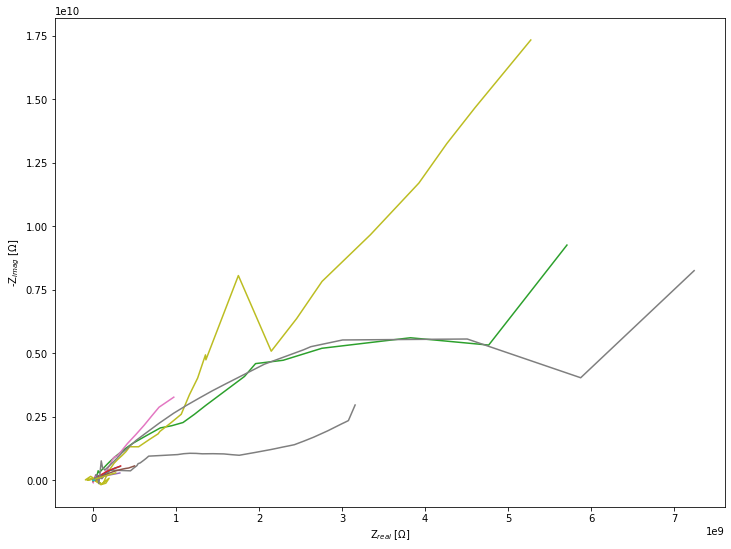

In [30]:
eis_pack_drawer(eis_imp_list = eis_ecm_2_raw_imp_list)

### 可视化EIS-ECM-2-Normed 阻抗数据

In [32]:
# Function location: prj/utils/file_utils/dataset_reader_pack/ml_dataset_reader.py
def get_normed_dataset_by_ecm_num(training_dataset, validation_dataset, test_dataset, ecm_num):
    """
    :param
        training_dataset, validation_dataset, test_dataset:
            list[
                    [label (int), [(x0, y0), (x1, y1), ..., (xn-2, yn-2), (xn-1, yn-1)]]
                ]
            the range of x or y is 0 ~ 1
        ecm_num:
    :return:
    """
    tr_data_list = [t_d[1] for t_d in training_dataset if t_d[0] == ecm_num]
    va_data_list = [v_d[1] for v_d in validation_dataset if v_d[0] == ecm_num]
    te_data_list = [te_d[1] for te_d in test_dataset if te_d[0] == ecm_num]

    eis_normed_imp_list = []
    eis_normed_imp_list.extend(tr_data_list)
    eis_normed_imp_list.extend(va_data_list)
    eis_normed_imp_list.extend(te_data_list)
    return eis_normed_imp_list

In [33]:
eis_ecm_2_normed_imp_list = get_normed_dataset_by_ecm_num(training_dataset, validation_dataset, test_dataset, ecm_num=2)
eis_ecm_2_normed_imp_list = split_eis_imp_2_real_imag(eis_ecm_2_normed_imp_list)

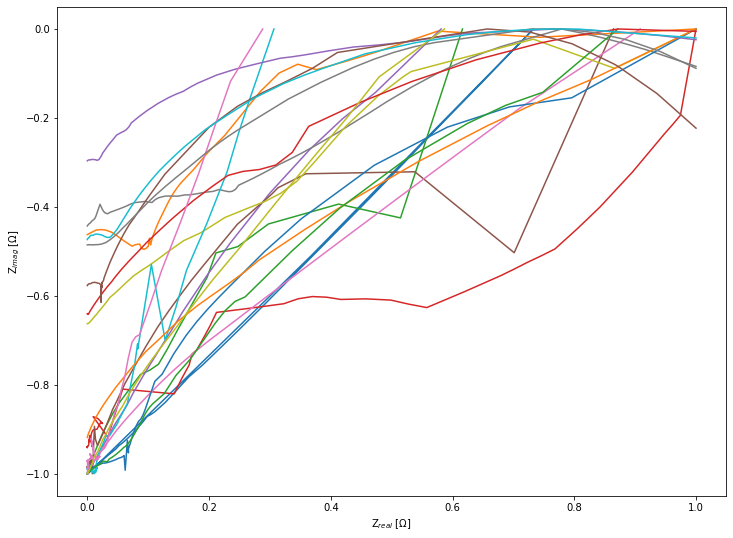

In [42]:
eis_normed_pack_drawer(eis_ecm_2_normed_imp_list)

## 可视化EIS-ECM-4阻抗数据

### 可视化EIS-ECM-4-Raw阻抗数据

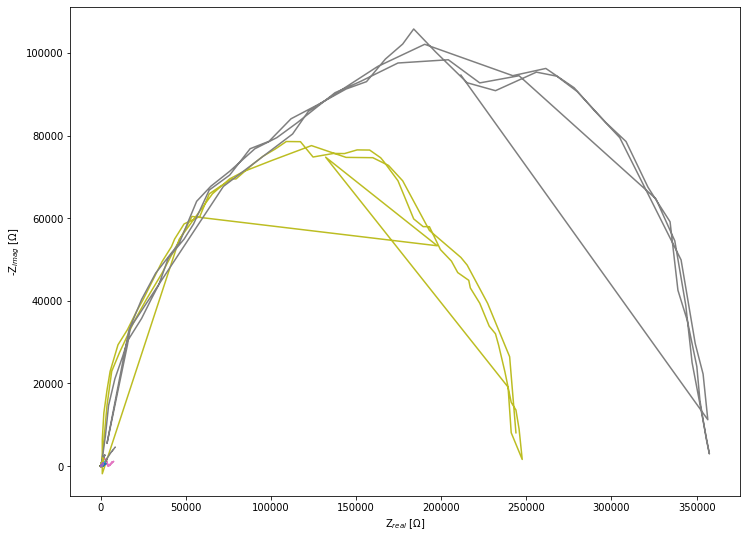

In [43]:
eis_ecm_4_raw_imp_list = get_raw_dataset_by_ecm_num(raw_training_dataset, raw_validation_dataset, raw_test_dataset, ecm_num = 4)
eis_ecm_4_raw_imp_list = split_eis_imp_2_real_imag(eis_raw_imp_list = eis_ecm_4_raw_imp_list)
eis_pack_drawer(eis_imp_list = eis_ecm_4_raw_imp_list)

### 可视化EIS-ECM-4-Normed阻抗数据

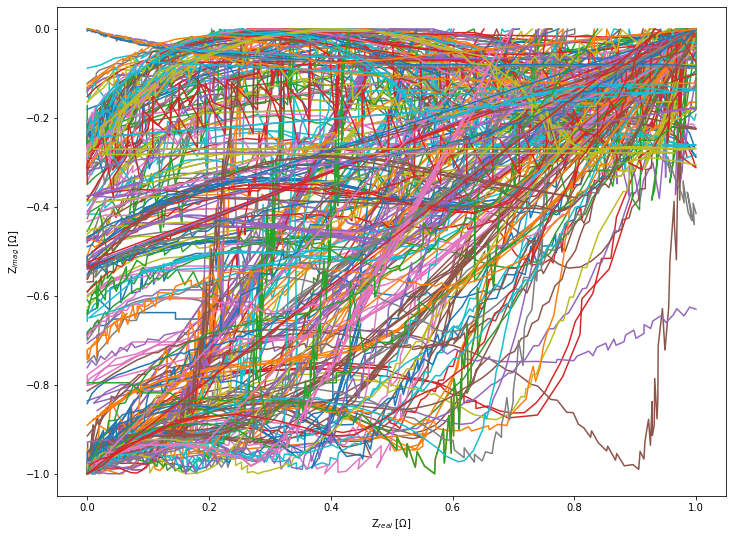

In [44]:
eis_ecm_4_normed_imp_list = get_normed_dataset_by_ecm_num(training_dataset, validation_dataset, test_dataset, ecm_num=4)
eis_ecm_4_normed_imp_list = split_eis_imp_2_real_imag(eis_ecm_4_normed_imp_list)
eis_normed_pack_drawer(eis_ecm_4_normed_imp_list)

## 可视化EIS-ECM-5阻抗数据

### 可视化EIS-ECM-5-Raw阻抗数据

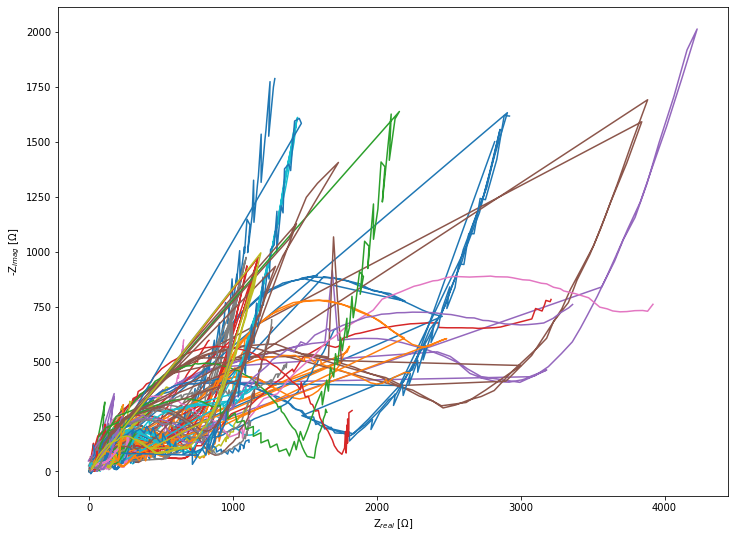

In [45]:
eis_ecm_5_raw_imp_list = get_raw_dataset_by_ecm_num(raw_training_dataset, raw_validation_dataset, raw_test_dataset, ecm_num = 5)
eis_ecm_5_raw_imp_list = split_eis_imp_2_real_imag(eis_raw_imp_list = eis_ecm_5_raw_imp_list)
eis_pack_drawer(eis_imp_list = eis_ecm_5_raw_imp_list)

### 可视化EIS-ECM-5-Normed阻抗数据

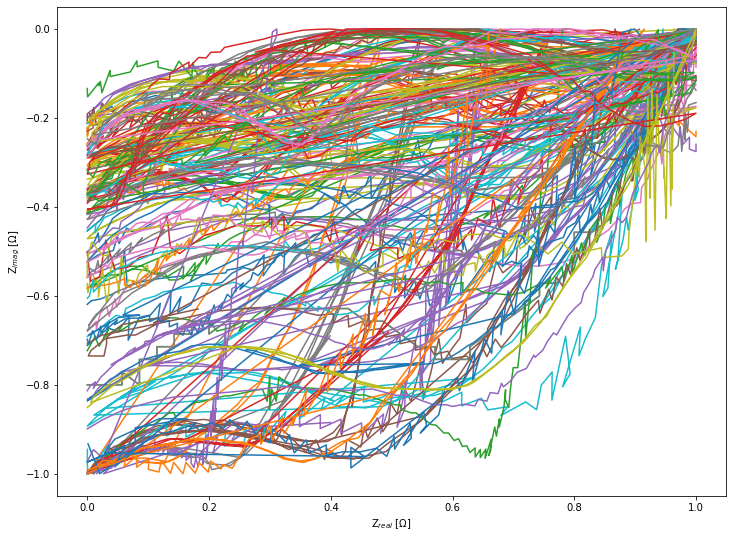

In [46]:
eis_ecm_5_normed_imp_list = get_normed_dataset_by_ecm_num(training_dataset, validation_dataset, test_dataset, ecm_num=5)
eis_ecm_5_normed_imp_list = split_eis_imp_2_real_imag(eis_ecm_5_normed_imp_list)
eis_normed_pack_drawer(eis_ecm_5_normed_imp_list)

## 可视化EIS-ECM-6阻抗数据

### 可视化EIS-ECM-6-Raw阻抗数据

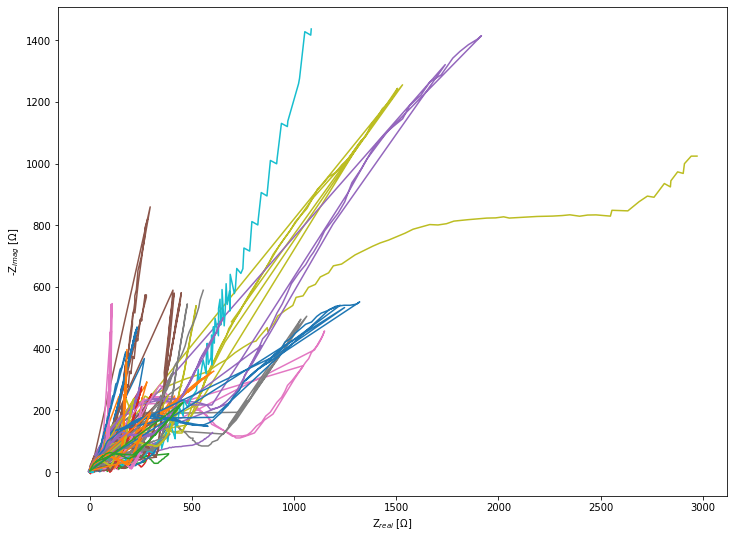

In [47]:
eis_ecm_6_raw_imp_list = get_raw_dataset_by_ecm_num(raw_training_dataset, raw_validation_dataset, raw_test_dataset, ecm_num = 6)
eis_ecm_6_raw_imp_list = split_eis_imp_2_real_imag(eis_raw_imp_list = eis_ecm_6_raw_imp_list)
eis_pack_drawer(eis_imp_list = eis_ecm_6_raw_imp_list)

### 可视化EIS-ECM-6-Normed阻抗数据

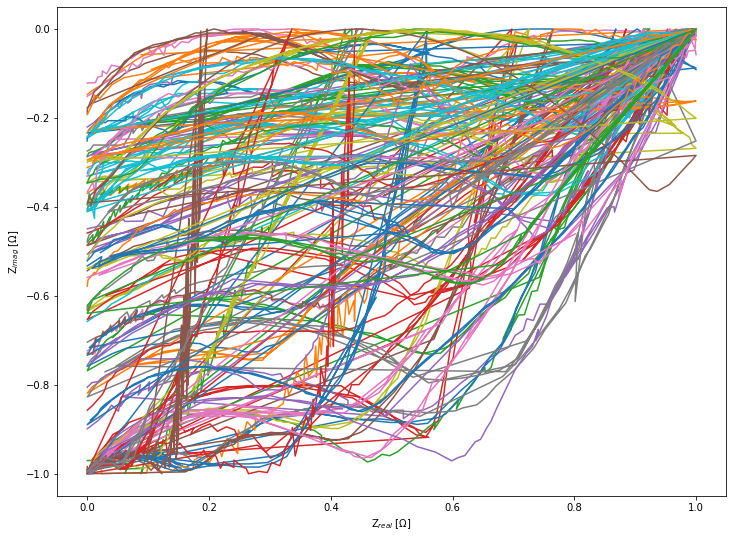

In [48]:
eis_ecm_6_normed_imp_list = get_normed_dataset_by_ecm_num(training_dataset, validation_dataset, test_dataset, ecm_num=6)
eis_ecm_6_normed_imp_list = split_eis_imp_2_real_imag(eis_ecm_6_normed_imp_list)
eis_normed_pack_drawer(eis_ecm_6_normed_imp_list)

## 可视化EIS-ECM-7阻抗数据

### 可视化EIS-ECM-7-Raw阻抗数据

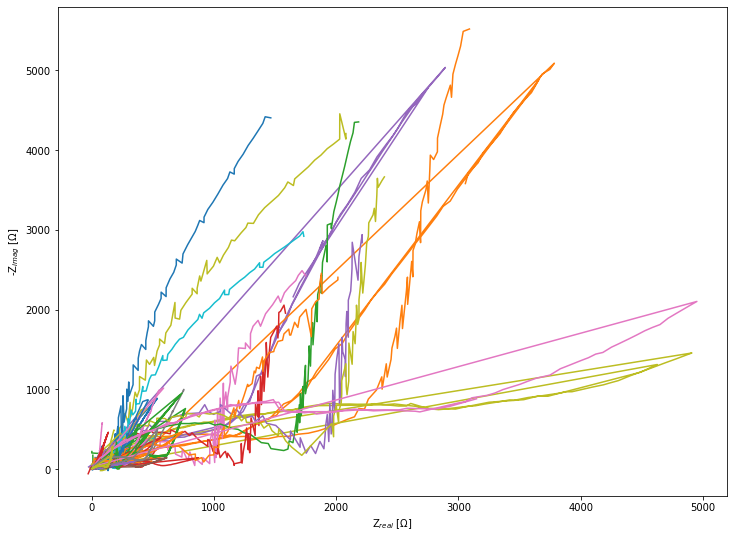

In [49]:
eis_ecm_7_raw_imp_list = get_raw_dataset_by_ecm_num(raw_training_dataset, raw_validation_dataset, raw_test_dataset, ecm_num = 7)
eis_ecm_7_raw_imp_list = split_eis_imp_2_real_imag(eis_raw_imp_list = eis_ecm_7_raw_imp_list)
eis_pack_drawer(eis_imp_list = eis_ecm_7_raw_imp_list)

### 可视化EIS-ECM-7-Normed阻抗数据

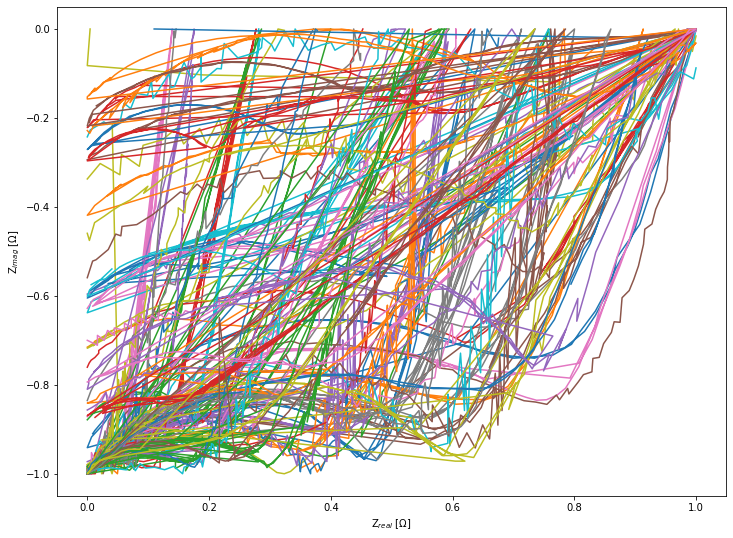

In [50]:
eis_ecm_7_normed_imp_list = get_normed_dataset_by_ecm_num(training_dataset, validation_dataset, test_dataset, ecm_num=7)
eis_ecm_7_normed_imp_list = split_eis_imp_2_real_imag(eis_ecm_7_normed_imp_list)
eis_normed_pack_drawer(eis_ecm_7_normed_imp_list)

## 可视化EIS-ECM-8阻抗数据

### 可视化EIS-ECM-8-Raw阻抗数据

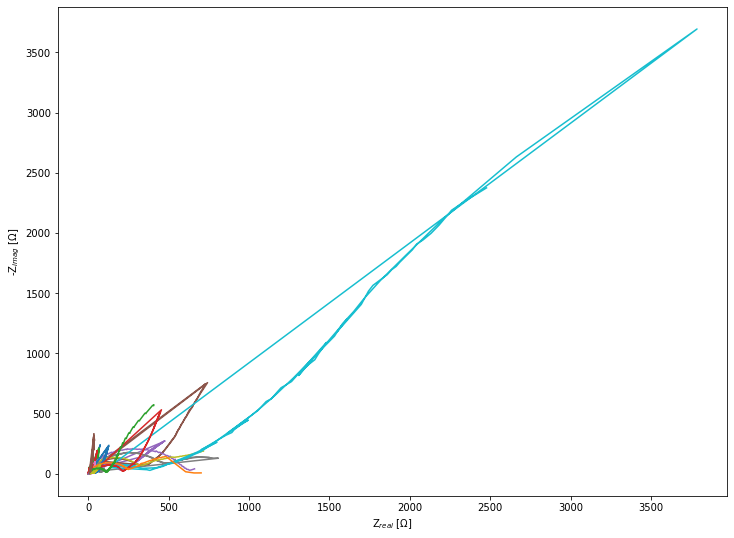

In [51]:
eis_ecm_8_raw_imp_list = get_raw_dataset_by_ecm_num(raw_training_dataset, raw_validation_dataset, raw_test_dataset, ecm_num = 8)
eis_ecm_8_raw_imp_list = split_eis_imp_2_real_imag(eis_raw_imp_list = eis_ecm_8_raw_imp_list)
eis_pack_drawer(eis_imp_list = eis_ecm_8_raw_imp_list)

### 可视化EIS-ECM-8-Normed阻抗数据

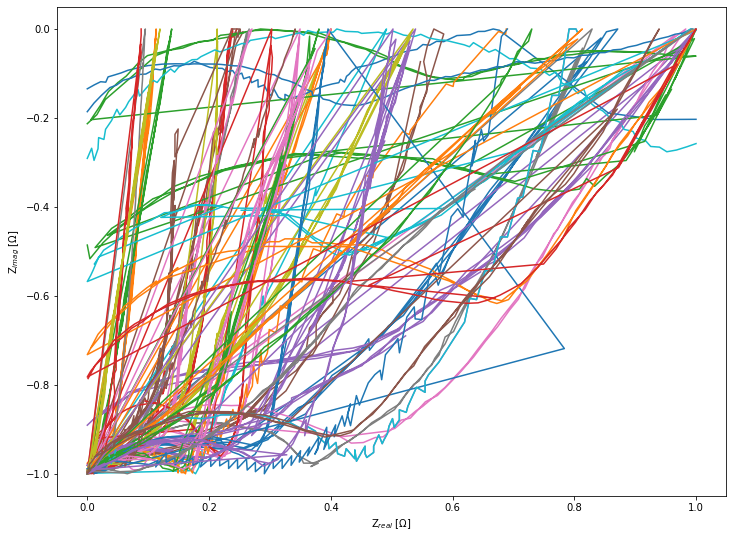

In [52]:
eis_ecm_8_normed_imp_list = get_normed_dataset_by_ecm_num(training_dataset, validation_dataset, test_dataset, ecm_num=8)
eis_ecm_8_normed_imp_list = split_eis_imp_2_real_imag(eis_ecm_8_normed_imp_list)
eis_normed_pack_drawer(eis_ecm_8_normed_imp_list)

## 可视化EIS-ECM-9阻抗数据

### 可视化EIS-ECM-9-Raw阻抗数据

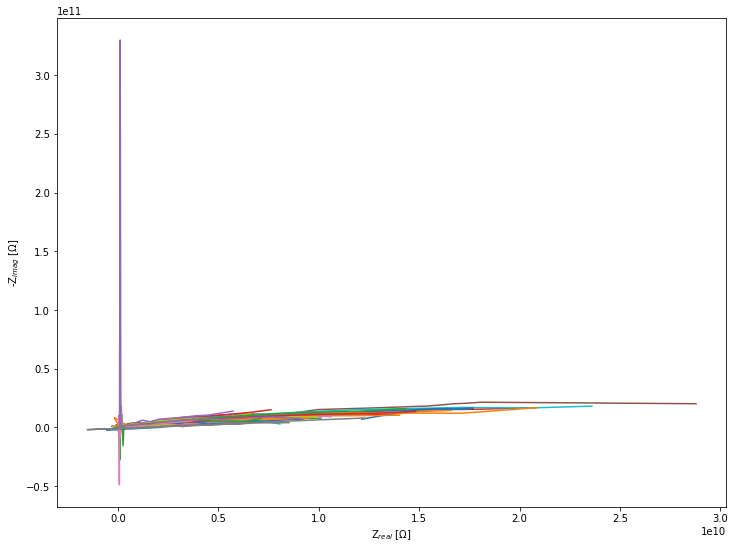

In [53]:
eis_ecm_9_raw_imp_list = get_raw_dataset_by_ecm_num(raw_training_dataset, raw_validation_dataset, raw_test_dataset, ecm_num = 9)
eis_ecm_9_raw_imp_list = split_eis_imp_2_real_imag(eis_raw_imp_list = eis_ecm_9_raw_imp_list)
eis_pack_drawer(eis_imp_list = eis_ecm_9_raw_imp_list)

### 可视化EIS-ECM-9-Normed阻抗数据

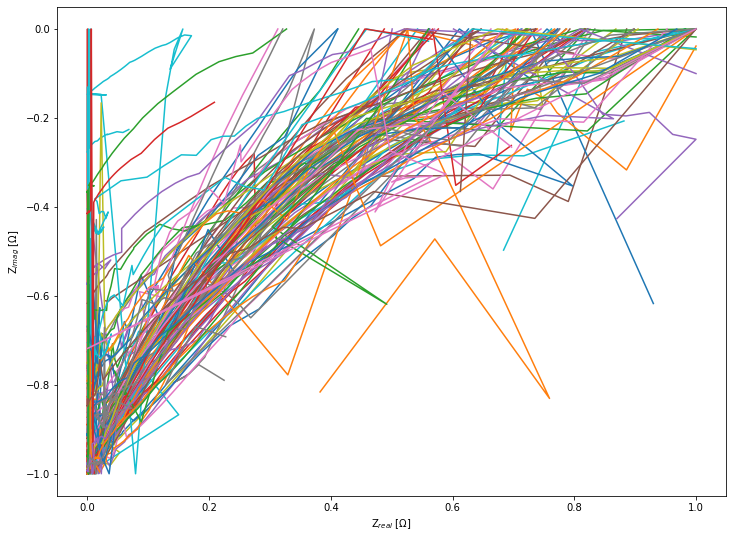

In [54]:
eis_ecm_9_normed_imp_list = get_normed_dataset_by_ecm_num(training_dataset, validation_dataset, test_dataset, ecm_num=9)
eis_ecm_9_normed_imp_list = split_eis_imp_2_real_imag(eis_ecm_9_normed_imp_list)
eis_normed_pack_drawer(eis_ecm_9_normed_imp_list)